In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
# from keras.metrics import sparse_top_k_categorical_accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from collections import Counter
import tensorflow.keras.backend as K
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import sys
import pandas as pd
import numpy as np
from PIL import Image
import io

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import scipy
from scipy.stats import chi2_contingency
from mippiNetbuild import *
# sys.path.append('../input/mippi0801')
# from transformer import *
np.random.seed(0)

In [7]:
# df_path = r'../../../data/raw/raw_s51_0805_p.csv'
df_path = r'../data/skempi2_window_with_pssm.dataset'
df = pd.read_pickle(df_path)

In [8]:
df.head()

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,par_seq,pos1_w,ori_win,mut_win,mutAC,oriAC,parAC,pssm_par0,pssm_mut0_win,pssm_mut1_win
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,38,QAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVRVFYNPGTNVVNH...,QAREYFTLHYPQYNVYFLPEGSPVTGDLRYNRVRVFYNPGTNVVNH...,1CSE_E_I_LI38G,1CSE_E_I_I,1CSE_E_I_E,"[[7.0, -7.0, -6.0, -7.0, -6.0, -6.0, -6.0, -5....","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ...","[[1.0, -2.0, -1.0, 2.0, -2.0, 1.0, 4.0, -3.0, ..."
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,38,QAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVRVFYNPGTNVVNH...,QAREYFTLHYPQYNVYFLPEGSPVTSDLRYNRVRVFYNPGTNVVNH...,1CSE_E_I_LI38S,1CSE_E_I_I,1CSE_E_I_E,"[[7.0, -7.0, -6.0, -7.0, -6.0, -6.0, -6.0, -5....","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ...","[[1.0, -2.0, -1.0, 2.0, -2.0, 1.0, 4.0, -3.0, ..."
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,38,QAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVRVFYNPGTNVVNH...,QAREYFTLHYPQYNVYFLPEGSPVTPDLRYNRVRVFYNPGTNVVNH...,1CSE_E_I_LI38P,1CSE_E_I_I,1CSE_E_I_E,"[[7.0, -7.0, -6.0, -7.0, -6.0, -6.0, -6.0, -5....","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ...","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ..."
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,38,QAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVRVFYNPGTNVVNH...,QAREYFTLHYPQYNVYFLPEGSPVTIDLRYNRVRVFYNPGTNVVNH...,1CSE_E_I_LI38I,1CSE_E_I_I,1CSE_E_I_E,"[[7.0, -7.0, -6.0, -7.0, -6.0, -6.0, -6.0, -5....","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ...","[[1.0, -2.0, -1.0, 2.0, -2.0, 1.0, 4.0, -3.0, ..."
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,AQTVPYGIPLIKADKVQAQGFKGANVKVAVLDTGIQASHPDLNVVG...,38,QAREYFTLHYPQYNVYFLPEGSPVTLDLRYNRVRVFYNPGTNVVNH...,QAREYFTLHYPQYNVYFLPEGSPVTDDLRYNRVRVFYNPGTNVVNH...,1CSE_E_I_LI38D,1CSE_E_I_I,1CSE_E_I_E,"[[7.0, -7.0, -6.0, -7.0, -6.0, -6.0, -6.0, -5....","[[1.0, -2.0, -1.0, 1.0, -2.0, 1.0, 4.0, -3.0, ...","[[1.0, -2.0, 0.0, 2.0, -2.0, 1.0, 4.0, -3.0, -..."


In [9]:
df.shape

(2950, 52)

In [10]:
aaDict = {'0':0, 'D':1, 'S':2, 'Q':3, 'K':4,
          'I':5, 'P':6, 'T':7, 'F':8, 'N':9,
          'G':10, 'H':11, 'L':12, 'R':13, 'W':14,
          'A':15, 'V':16, 'E':17, 'Y':18, 'M':19, 'C':20}
max_len = 1024
mut0_c = [[aaDict[x] for x in a] for a in df['ori_win']]
mut1_c = [[aaDict[x] for x in a] for a in df['mut_win']]
par0_c = [[aaDict[x] for x in a] for a in df['par_seq']]
# par1_c = [[aaDict[x] for x in a] for a in df['par0']]

window_len = 51
mut0_c = keras.preprocessing.sequence.pad_sequences(mut0_c, maxlen=window_len, padding='post')
mut1_c = keras.preprocessing.sequence.pad_sequences(mut1_c, maxlen=window_len, padding='post')
par0_c = keras.preprocessing.sequence.pad_sequences(par0_c, maxlen=max_len, padding='post')
# par1_c = keras.preprocessing.sequence.pad_sequences(par1_c, maxlen=window_len, padding='post')

# label = np.array(df['label'])
# # label = to_categorical(label, num_classes=5)
# # before change column: no_effect:0, disrupting:1, decreasing:2, increasing:3, causing:4
# # label = label[:, [1, 2, 0, 3, 4]]
# print(label.shape)

In [11]:
pssm_win_mut0 = df['pssm_mut0_win'].values
pssm_win_mut0 = np.stack(pssm_win_mut0, axis=0).astype('float32')
print(pssm_win_mut0.shape)

pssm_win_mut1 = df['pssm_mut1_win'].values
pssm_win_mut1 = np.stack(pssm_win_mut1, axis=0).astype('float32')
print(pssm_win_mut1.shape)

(2950, 51, 20)
(2950, 51, 20)


In [12]:
pssm_par0 = df['pssm_par0'].values
pssm_par0 = [x[:1024, :] for x in pssm_par0] # restrict par protein length to 1024
pssm_par0 = np.stack(pssm_par0, axis=0).astype('float32')
print(pssm_par0.shape)

(2950, 1024, 20)


In [13]:
data = [mut0_c, mut1_c, par0_c, pssm_win_mut0, pssm_win_mut1, pssm_par0]
data_reverse = [mut1_c, mut0_c, par0_c, pssm_win_mut1, pssm_win_mut0, pssm_par0]
data_no = [mut0_c, mut0_c, par0_c, pssm_win_mut0, pssm_win_mut0, pssm_par0]

In [14]:
K.clear_session()
model = build_model()
model.summary()
adam = optimizers.Adam(learning_rate=0.0002)

# model_path = r'./pssm_in_trans/bestAcc.h53'
# model_path = r'/lustre/home/acct-bmelgn/bmelgn-2/QianWei/MIPPI2/src/kaggle/cross_validation/activation_test/s51_leaky_3block_wfl_gp_HE/bestAcc.h51'


# model_path = r'bestAcc.h54'
# model.load_weights(model_path)
model.compile(adam, loss=categorical_focal_loss(alpha=[.25, .25, .1, .25], gamma=2.), 
              metrics=['acc', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top2acc')])

score_arr = np.zeros((data[0].shape[0], 4))
score_reverse_arr = np.zeros((data[0].shape[0], 4))
class_arr = np.zeros((data[0].shape[0], 5))
class_reverse_arr = np.zeros((data[0].shape[0], 5))
for i in range(5):
    model_path = r'../models/bestAcc.h5' + str(i)
    model.load_weights(model_path)
    pred = model.predict(data)
    pred_reverse = model.predict(data_reverse)
    pred_no = model.predict(data_no)
    pred_class = pred.argmax(axis=-1)
    pred_reverse_class = pred_reverse.argmax(axis=-1)
    pred_no_class = pred_no.argmax(axis=-1)
    df['pred_class' + str(i)] = pred_class
    df['pred_reverse_class' + str(i)] = pred_reverse_class
    df['pred_no_class' + str(i)] = pred_no_class
    score_arr += pred
    score_reverse_arr += pred_reverse
    
    class_arr[:, i] = pred_class
    class_reverse_arr[:, i] = pred_reverse_class

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 51)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 51)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 51, 20)]     0                                            
______________________________________________________________________________________________

In [15]:
from collections import Counter
consistent_score = np.zeros(df.shape[0])
most_common = np.zeros(df.shape[0])
for i in range(class_arr.shape[0]):
    consistent_score[i] = Counter(class_arr[i]).most_common()[0][1]
    most_common[i] = Counter(class_arr[i]).most_common()[0][0]
df['con_score'] = consistent_score
df['most_common'] = most_common

In [16]:
score_cv5_class = score_arr.argmax(axis=-1)
score_cv5_reverse_class = score_reverse_arr.argmax(axis=-1)
df['cv5_class'] = score_cv5_class
df['cv5_reverse_class'] = score_cv5_reverse_class
df['cv5_score'] = (score_arr / 5).max(axis=-1)
df['cv5_reverse_score'] = (score_reverse_arr / 5).max(axis=-1)
df.head()

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,pred_no_class3,pred_class4,pred_reverse_class4,pred_no_class4,con_score,most_common,cv5_class,cv5_reverse_class,cv5_score,cv5_reverse_score
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,2,0,0,2,3.0,1.0,1,0,0.438483,0.318623
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,2,0,0,2,2.0,0.0,1,1,0.299126,0.336999
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,2,0,0,2,3.0,1.0,1,3,0.446083,0.377945
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,2,2,2,2,4.0,2.0,2,2,0.631698,0.677381
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,2,0,0,2,2.0,0.0,1,3,0.405555,0.416197


In [17]:
all_cv5_class = np.c_[df['pred_class0'].values, df['pred_class1'].values, df['pred_class2'].values, df['pred_class3'].values, df['pred_class4'].values]

In [18]:
df.groupby('cv5_reverse_class').mean()['ddg']

cv5_reverse_class
0    0.481254
1    0.410934
2    0.974466
3    1.129464
Name: ddg, dtype: float64

In [19]:
df.groupby('cv5_class').mean()['ddg']

cv5_class
0    1.123249
1    1.157146
2    0.874668
3   -0.105656
Name: ddg, dtype: float64

In [20]:
df['ddg'].mean()

0.9849118983015812

In [21]:
df['ddg'].median()

0.5789455987610201

In [22]:
df[df['ddg'] <= 0]['ddg'].shape

(730,)

In [23]:
df[df['cv5_class'] == 2]['ddg'].mean()

0.8746680377392632

In [26]:
Counter(df['ddg'] < 0)

Counter({False: 2282, True: 668})

In [27]:
Counter(df['cv5_class'])

Counter({1: 748, 2: 839, 0: 1180, 3: 183})

In [28]:
Counter(df['cv5_reverse_class'])

Counter({0: 295, 1: 92, 3: 1472, 2: 1091})

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


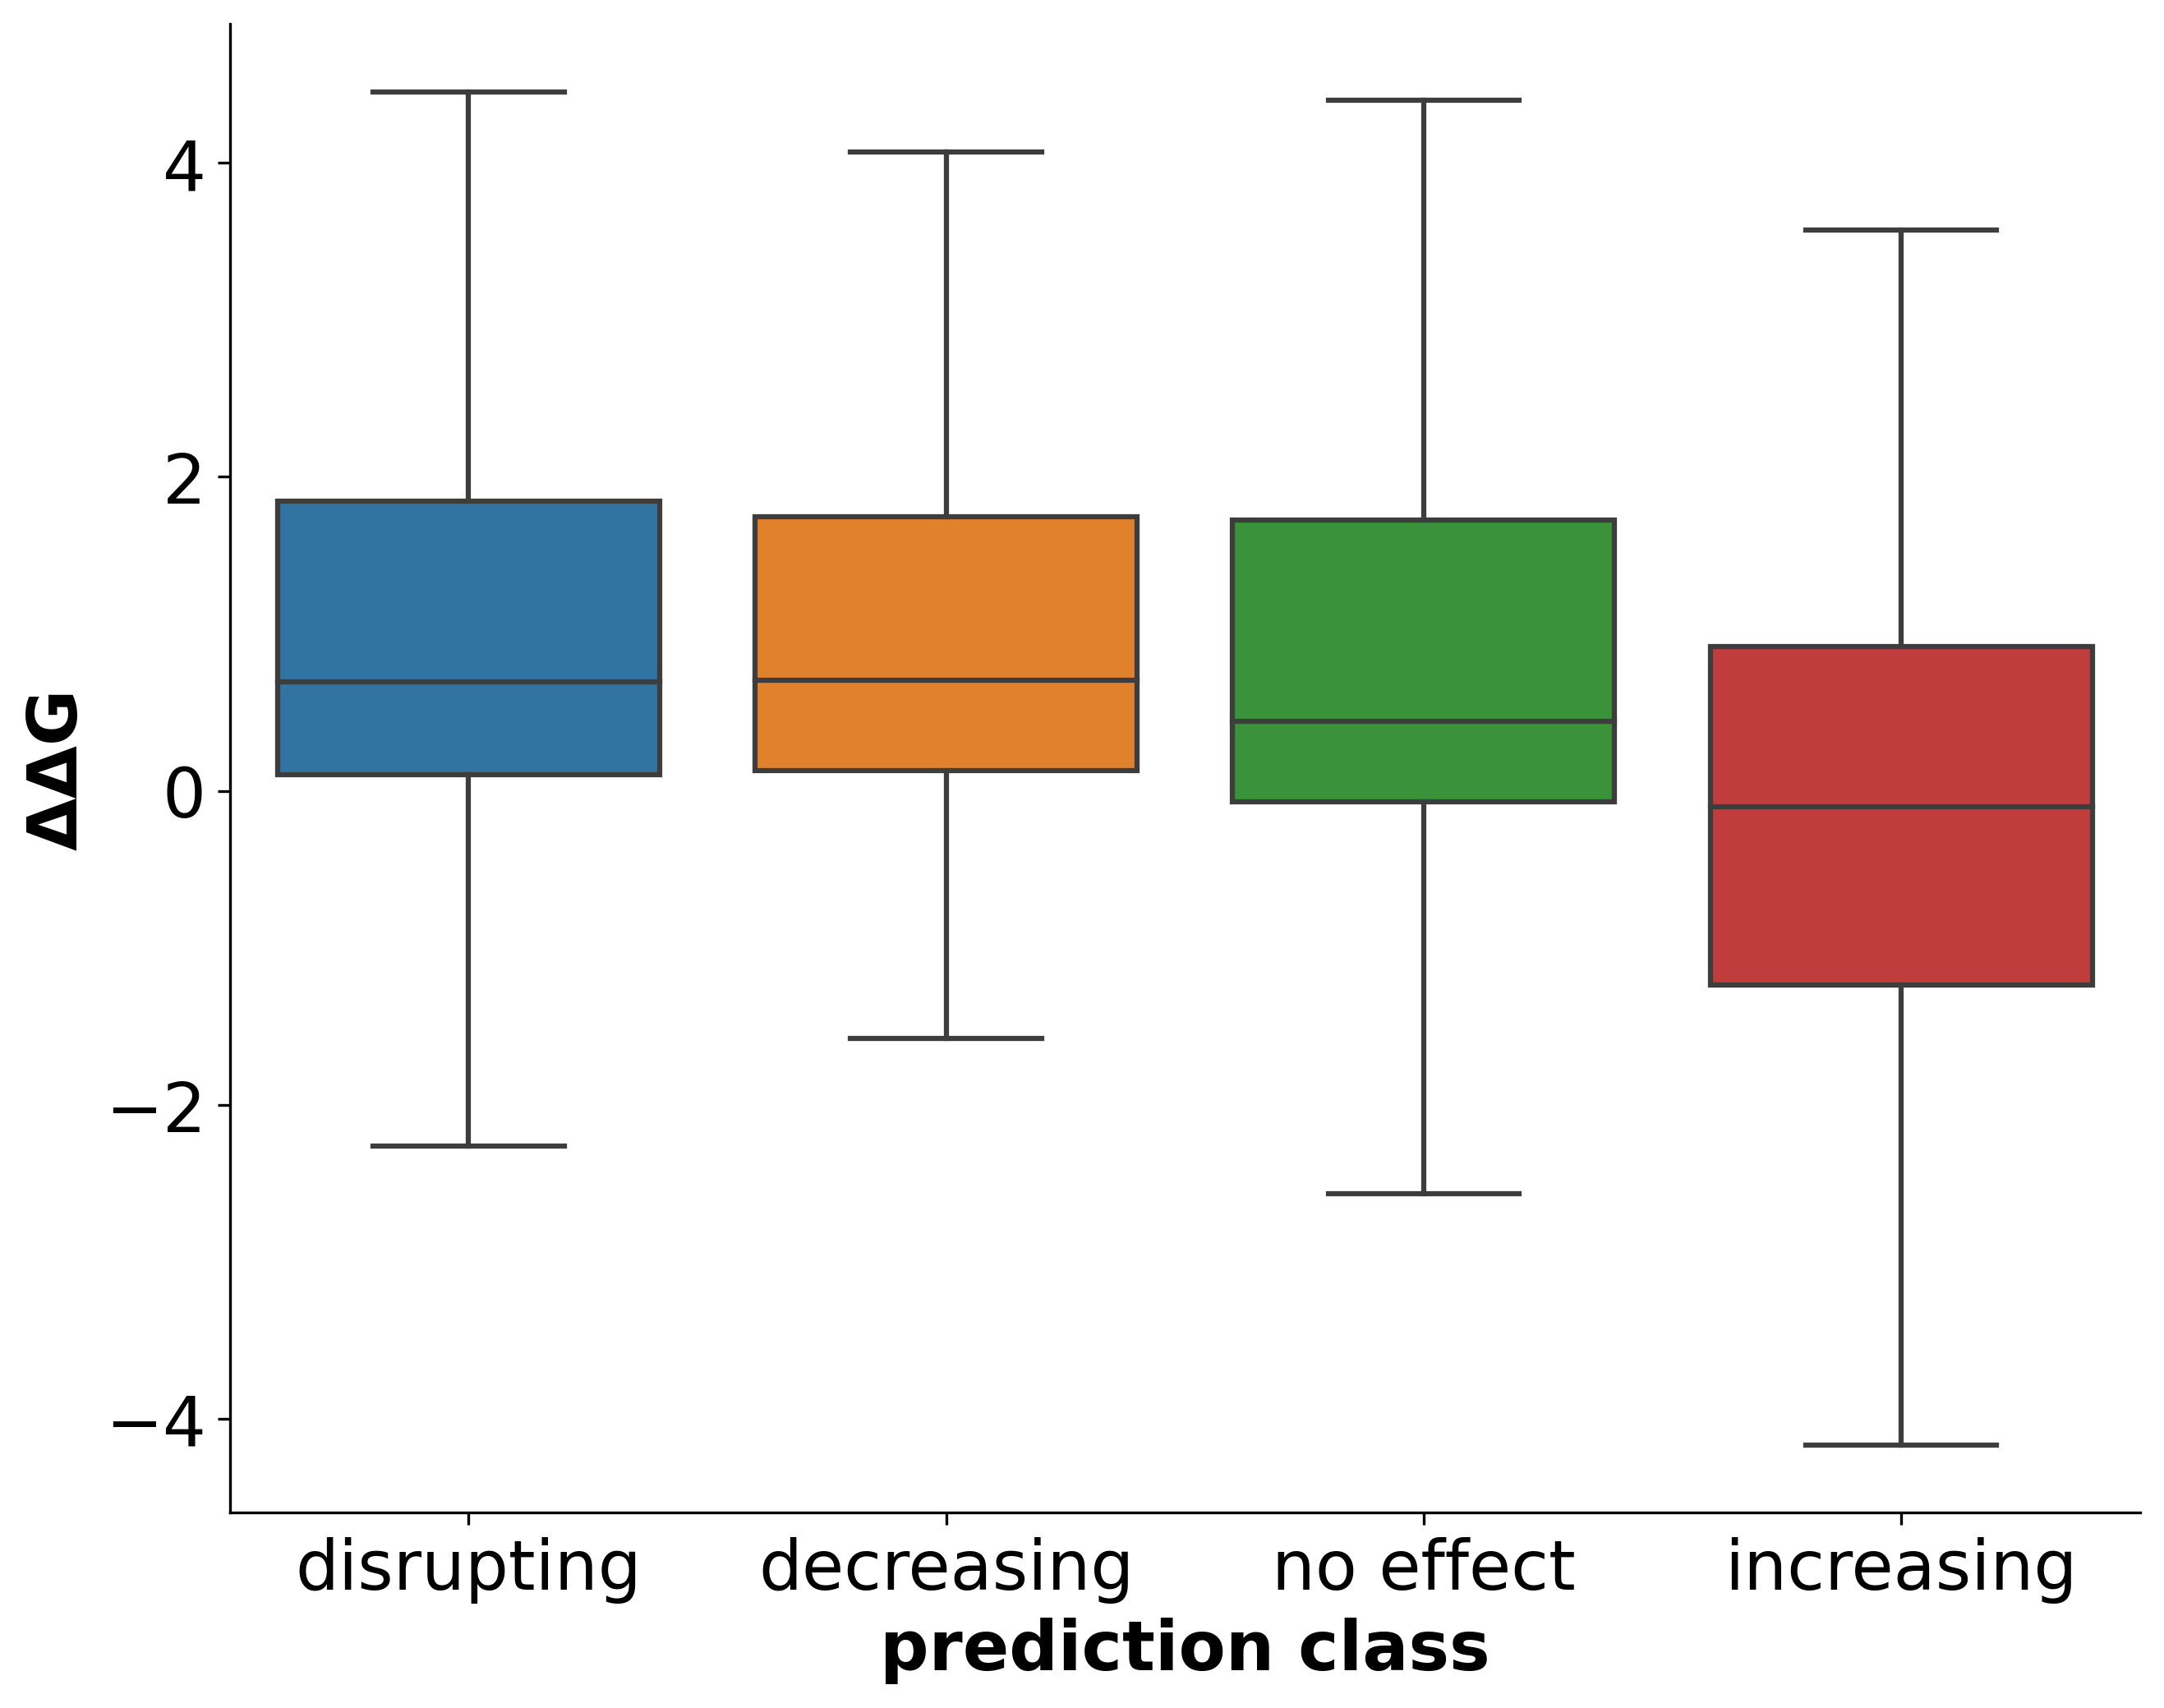

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8), dpi=300)
pred_list = ['disrupting', 'decreasing', 'no effect', 'increasing']
sns.boxplot(x="cv5_class", y="ddg", data=df, showfliers = False)
plt.xticks([0, 1, 2, 3], pred_list, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('prediction class', fontsize=20, fontweight='bold')
plt.ylabel('ΔΔG', fontsize=20, fontweight='bold')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.savefig('ddg_ori.jpg', dpi=300)


png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("ddg_ori_tif.tiff", dpi=png2.info['dpi'])
png1.close()

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


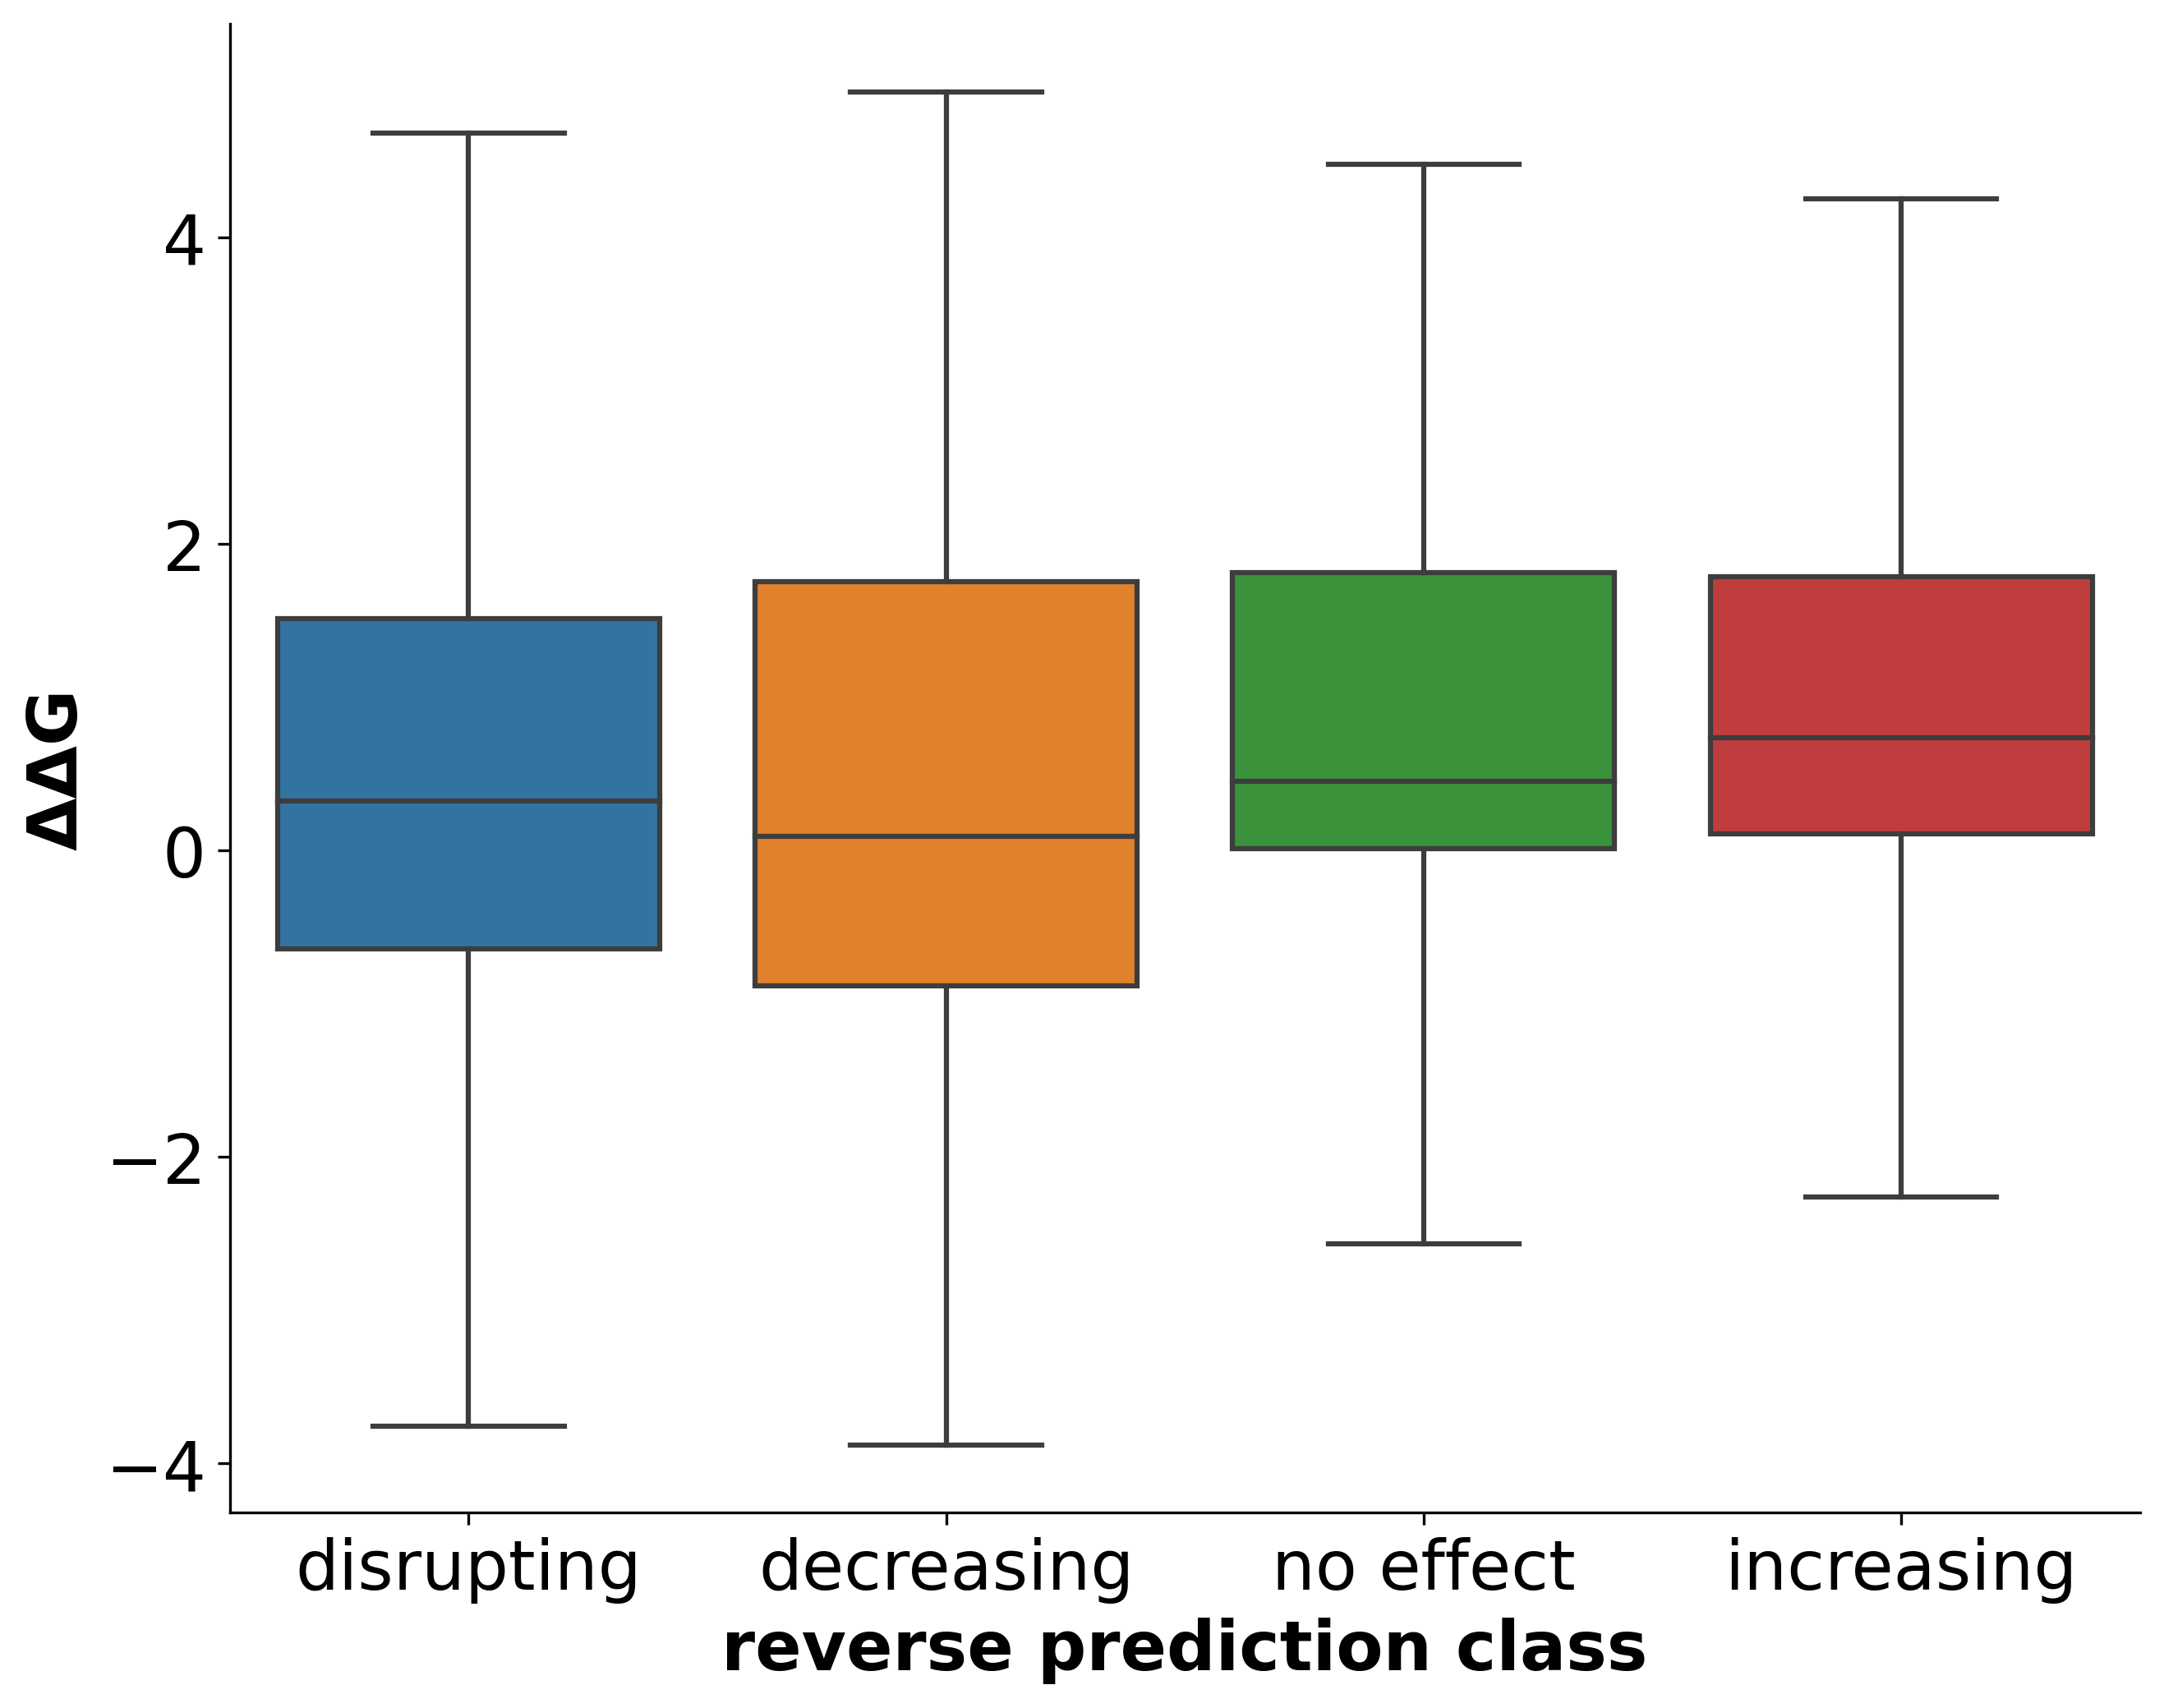

In [91]:
plt.figure(figsize=(10, 8), dpi=300)
pred_list = ['disrupting', 'decreasing', 'no effect', 'increasing']
sns.boxplot(x="cv5_reverse_class", y="ddg", data=df, showfliers = False)
plt.xticks([0, 1, 2, 3], pred_list, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('reverse prediction class', fontsize=20, fontweight='bold')
plt.ylabel('ΔΔG', fontsize=20, fontweight='bold')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.tight_layout()
# plt.savefig('ddg_re.jpg', dpi=300)

png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("ddg_re_tif.tiff", dpi=png2.info['dpi'])
png1.close()

In [31]:
df.groupby(['cv5_class', 'cv5_reverse_class'])['ddg'].mean()

cv5_class  cv5_reverse_class
0          0                    1.379915
           1                    2.141847
           2                    1.091576
           3                    1.088493
1          0                    0.537907
           1                    1.788208
           2                    0.552125
           3                    1.159337
2          0                    0.418998
           1                    0.465568
           2                    0.924604
           3                    0.467858
3          0                   -0.476510
           1                   -0.097507
           2                    1.744785
           3                    2.165483
Name: ddg, dtype: float64

<AxesSubplot:>

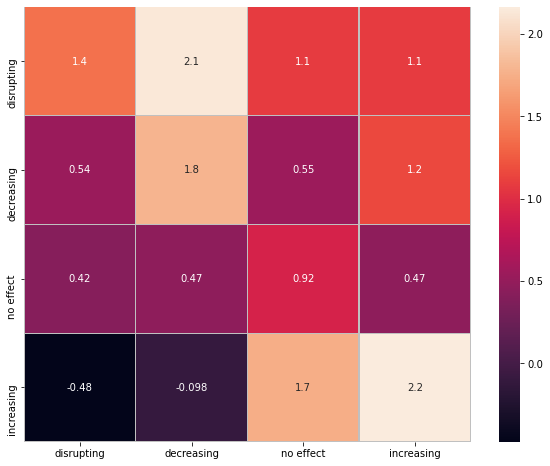

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.groupby(['cv5_class', 'cv5_reverse_class'])['ddg'].mean().values.reshape(4, -1), xticklabels=labels, yticklabels=labels,
            linewidths=0.1, linecolor='silver', annot=True, fmt='.2g')

In [33]:
df.groupby(['cv5_class', 'cv5_reverse_class'])['ddg'].count()

cv5_class  cv5_reverse_class
0          0                    112
           1                      7
           2                    324
           3                    737
1          0                     10
           1                     15
           2                      8
           3                    715
2          0                     72
           1                      5
           2                    755
           3                      7
3          0                    101
           1                     65
           2                      4
           3                     13
Name: ddg, dtype: int64

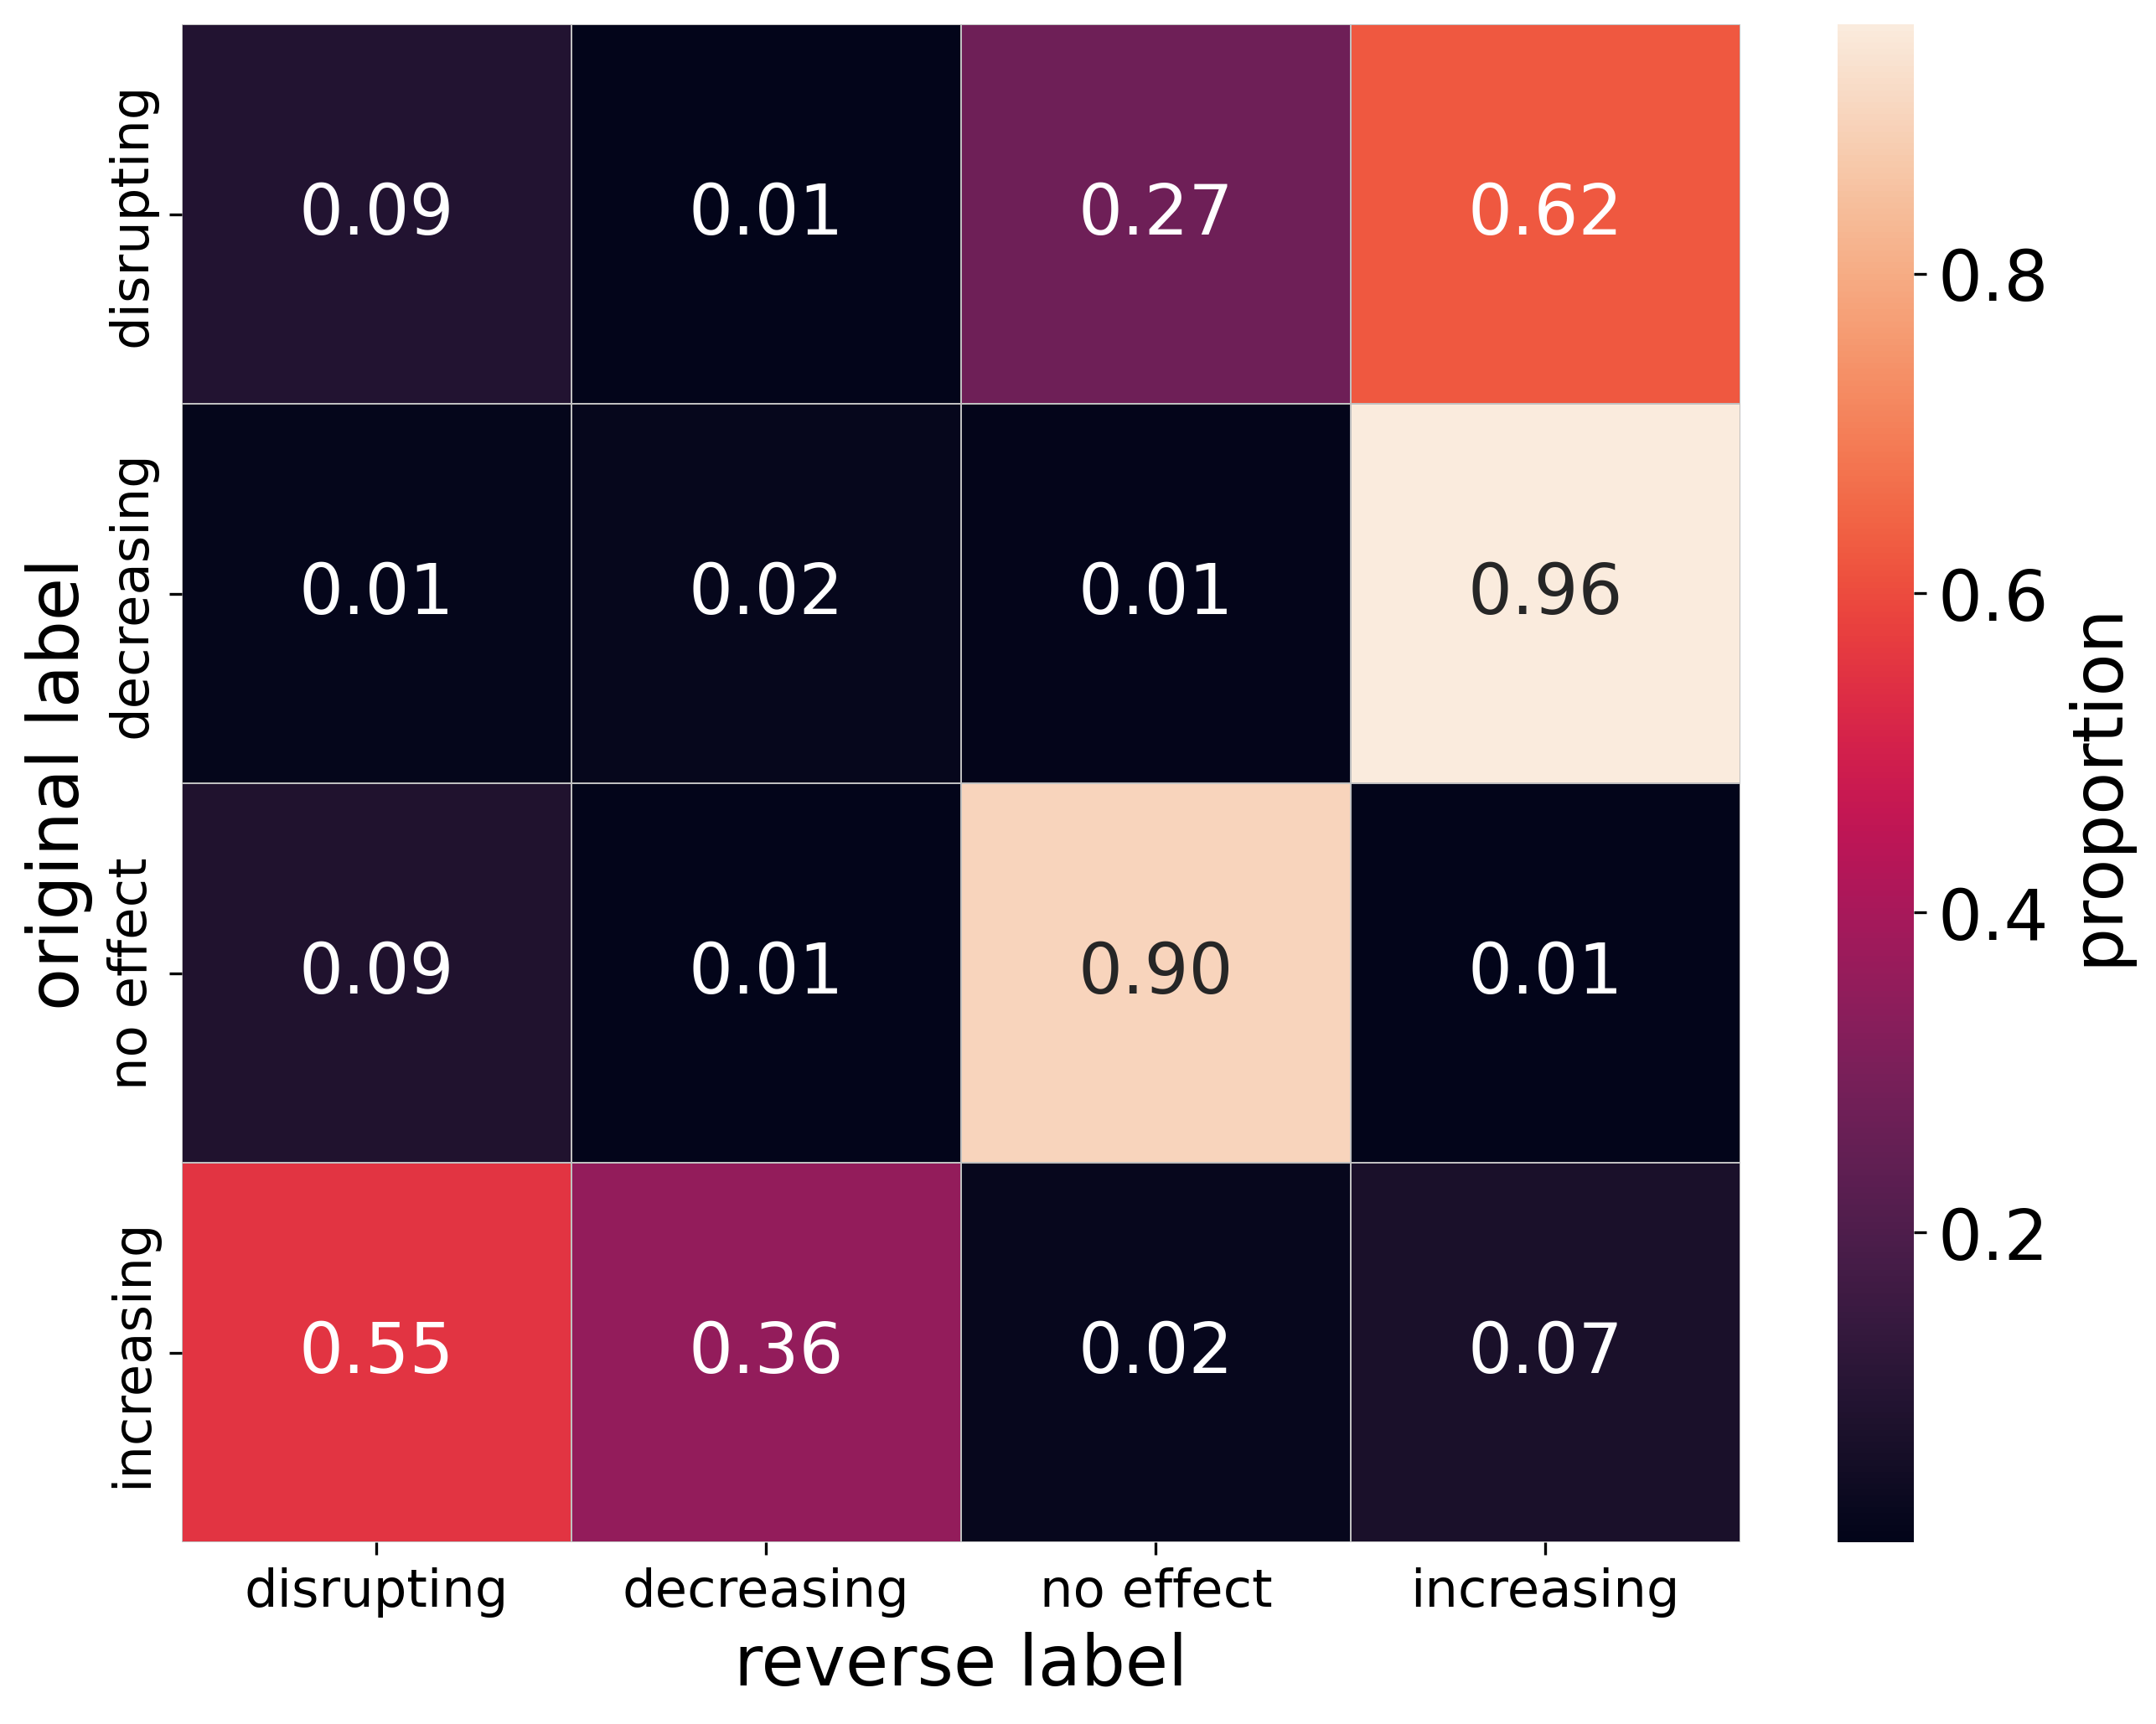

In [90]:
labels = ['disrupting', 'decreasing','no effect', 'increasing']
plt.figure(figsize=(10, 8), dpi=300)
cm = confusion_matrix(df['cv5_class'], df['cv5_reverse_class'], 
                      normalize='true')
ax = sns.heatmap(cm, xticklabels=labels, yticklabels=labels,
                linewidths=0.1, linecolor='silver', annot=True, fmt='.2f', annot_kws={"size": 20}, cbar_kws={ "label": 'proportion'})
# ax.set(xlabel='predict label', ylabel='true label')
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
ax.figure.axes[-1].yaxis.label.set_size(20)
# ax.figure.axes[-1].yaxis.label.set_weight('bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, va='center')
plt.xlabel('reverse label', fontsize=20)
plt.ylabel('original label', fontsize=20)
# plt.savefig('class_transmit.jpg', dpi=300)

png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
png2.save("class_transmit_tif.tiff", dpi=png2.info['dpi'])
png1.close()

In [36]:
Counter(df[df['cv5_class'] == 3]['ddg'] > 0)

Counter({False: 97, True: 86})

0.10971028423808243 0.00015931497669348694
R-squared: 0.012036


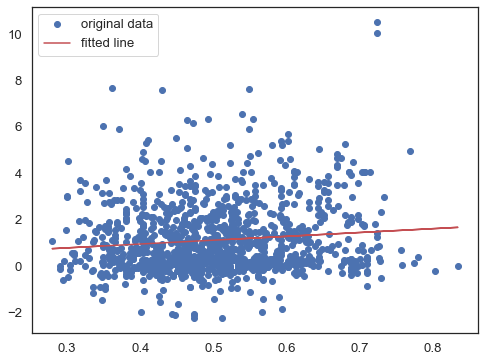

In [131]:
from scipy import stats
x, y = df[df['cv5_class'] == 0]['cv5_score'], df[df['cv5_class'] == 0]['ddg']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(r_value, p_value)
print("R-squared: %f" % r_value**2)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

(300, 300)


<Figure size 3000x3000 with 0 Axes>

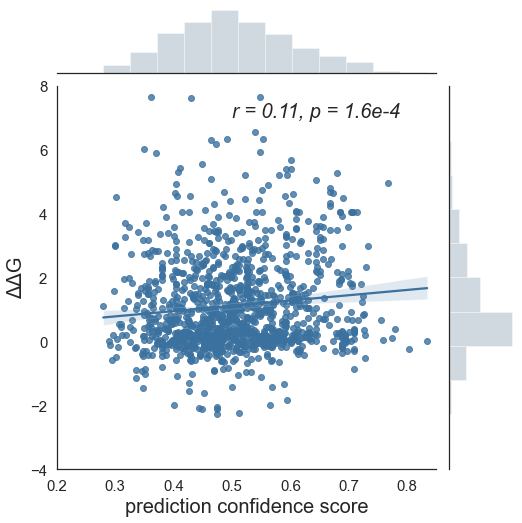

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)

df_a = df[(df['cv5_class'] == 0)]
g = plt.figure(figsize=(10, 10), dpi=300)
g = sns.JointGrid(data=df_a, x='cv5_score', y='ddg', height=5, xlim=(0.2, 0.85), ylim=(-4, 8))
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('prediction confidence score', fontsize=20)
plt.ylabel('ΔΔG', fontsize=20)
# plt.tight_layout()
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0.5, 7, 'r = 0.11, p = 1.6e-4', fontstyle='italic', fontsize=20)
# increasing class
# g.ax_joint.text(0.6, 6, 'r = -0.59, p = 1.1e-18', fontstyle='italic', fontsize=20)
#no effect
# g.ax_joint.text(0.6, 6, 'r = -0.13, p = 2e-4', fontstyle='italic', fontsize=20)
# decreasing
# g.ax_joint.text(0.6, 6, 'r = 0.07, p = 4.8e-2', fontstyle='italic', fontsize=20)
# disrupting
# g.ax_joint.text(0.5, 7, 'r = 0.11, p = 1.6e-4', fontstyle='italic', fontsize=20)

g.fig.set_size_inches(8,8)

# plt.title('decreasing prediction ddg')
# plt.savefig('skempi2_increasing_withtest_copy1_test.jpg', dpi=300)

png1 = io.BytesIO()
plt.savefig(png1, format="png", dpi=300)

# Load this image into PIL
png2 = Image.open(png1)

# Save as TIFF
print(png2.info['dpi'])
png2.save("skempi2_disrupting_withtest_tif.tiff", dpi=png2.info['dpi'])
png1.close()

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


{'Software': 'Matplotlib version3.3.1, https://matplotlib.org/', 'dpi': (300, 300)}


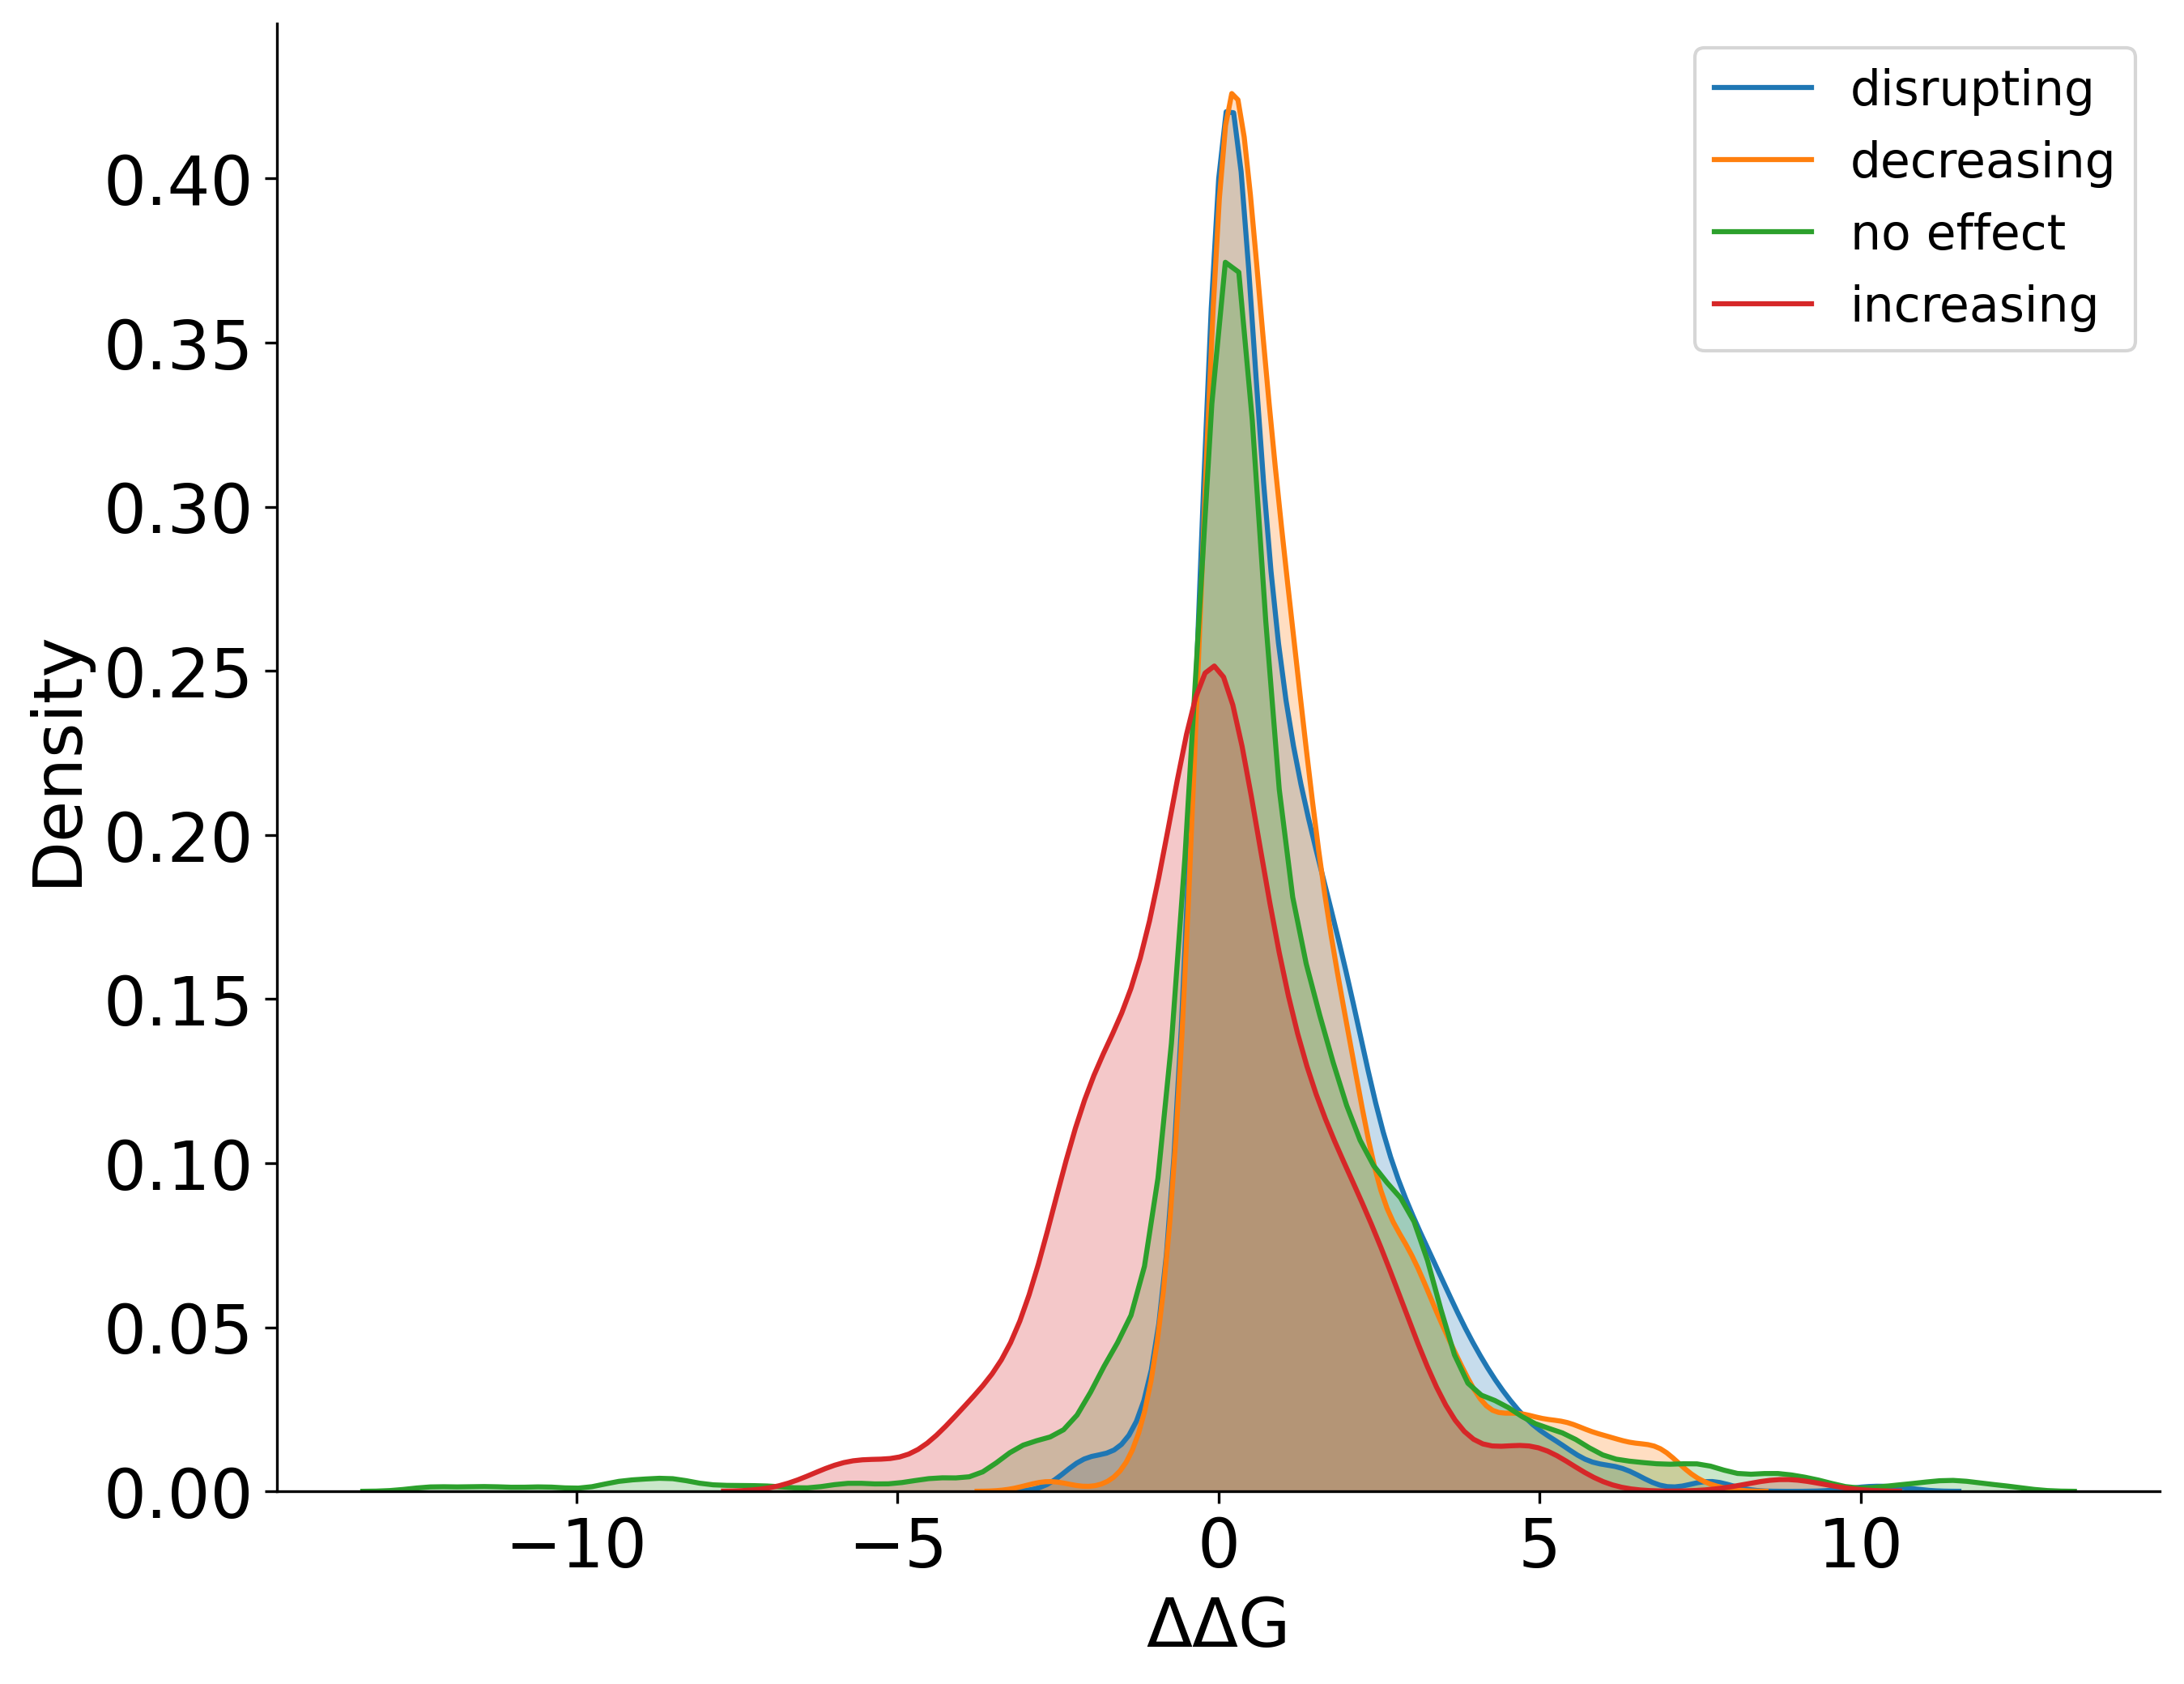

In [89]:
plt.figure(figsize=(10, 8), dpi=300)
labels = ['disrupting', 'decreasing', 'no effect', 'increasing']
for i in range(4):
    sns.kdeplot(df[df['cv5_class'] == i]['ddg'], shade=True, label=labels[i])
plt.legend(fontsize='x-large', title_fontsize='20')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('ΔΔG', fontsize=20)
plt.ylabel('Density', fontsize=20)
# plt.savefig('density_distribution.jpg', dpi=300)

png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)
print(png2.info)

# Save as TIFF
png2.save("density_distribution_tif.tiff", dpi=png2.info['dpi'])
png1.close()

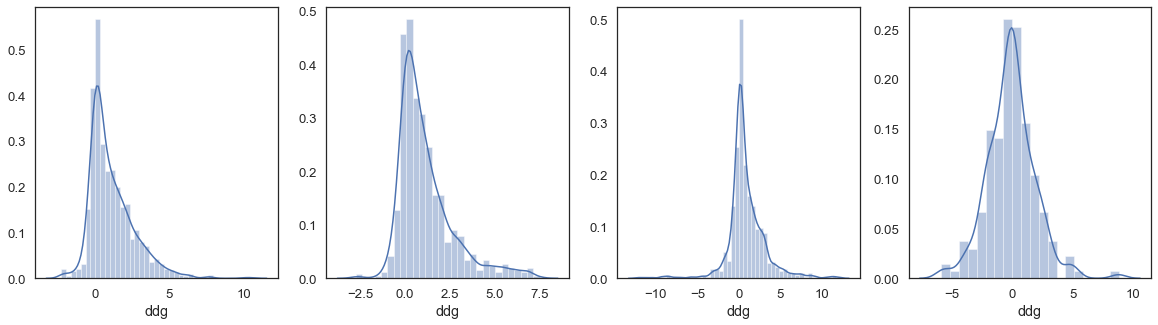

In [60]:
import seaborn as sns
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for i in range(4):
    sns.distplot(df[df['cv5_class'] == i]['ddg'], ax=ax[i])

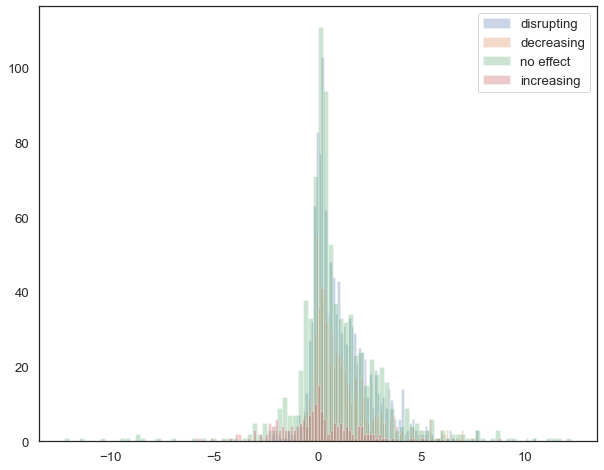

In [61]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.hist(df[df['cv5_class'] == i]['ddg'], label=labels[i], alpha=0.3, bins=100)
plt.legend(loc='best')

## test special items from original set

In [49]:
def get_predict(df, model=None):
    aaDict = {'0':0, 'D':1, 'S':2, 'Q':3, 'K':4,
              'I':5, 'P':6, 'T':7, 'F':8, 'N':9,
              'G':10, 'H':11, 'L':12, 'R':13, 'W':14,
              'A':15, 'V':16, 'E':17, 'Y':18, 'M':19, 'C':20}
    max_len = 1024
    mut0_c = [[aaDict[x] for x in a] for a in df['mut0_51']]
    mut1_c = [[aaDict[x] for x in a] for a in df['mut1_51']]
    par0_c = [[aaDict[x] for x in a] for a in df['par0']]
    # par1_c = [[aaDict[x] for x in a] for a in df['par0']]

    window_len = 51
    mut0_c = keras.preprocessing.sequence.pad_sequences(mut0_c, maxlen=window_len, padding='post')
    mut1_c = keras.preprocessing.sequence.pad_sequences(mut1_c, maxlen=window_len, padding='post')
    par0_c = keras.preprocessing.sequence.pad_sequences(par0_c, maxlen=max_len, padding='post')

    pssm_win_mut0 = df['pssm_win_mut0'].values
    pssm_win_mut0 = np.stack(pssm_win_mut0, axis=0).astype('float32')
    print(pssm_win_mut0.shape)

    pssm_win_mut1 = df['pssm_win_mut1'].values
    pssm_win_mut1 = np.stack(pssm_win_mut1, axis=0).astype('float32')
    print(pssm_win_mut1.shape)

    pssm_par0 = df['pssm_par0'].values
    pssm_par0 = [x[:1024, :] for x in pssm_par0] # restrict par protein length to 1024
    pssm_par0 = np.stack(pssm_par0, axis=0).astype('float32')
    print(pssm_par0.shape)

    data = [mut0_c, mut1_c, par0_c, pssm_win_mut0, pssm_win_mut1, pssm_par0]
    data_reverse = [mut1_c, mut0_c, par0_c, pssm_win_mut1, pssm_win_mut0, pssm_par0]
    data_no = [mut0_c, mut0_c, par0_c, pssm_win_mut0, pssm_win_mut0, pssm_par0]

    score_arr = np.zeros((data[0].shape[0], 4))
    score_reverse_arr = np.zeros((data[0].shape[0], 4))
    score_no_arr = np.zeros((data[0].shape[0], 4))

    for i in range(5):
        model_path = r'./cv5_notest/bestAcc.h5' + str(i)
        model.load_weights(model_path)
        pred = model.predict(data)
        pred_reverse = model.predict(data_reverse)
        pred_no = model.predict(data_no)

        score_arr += pred
        score_reverse_arr += pred_reverse
        score_no_arr += pred_no
    
    pred_class = score_arr.argmax(axis=-1)
    pred_reverse_class = score_reverse_arr.argmax(axis=-1)
    pred_no_class = score_no_arr.argmax(axis=-1)
    
#     pred = model.predict(data)
#     pred_reverse = model.predict(data_reverse)
#     pred_no = model.predict(data_no)
#     pred_class = pred.argmax(axis=-1)
#     pred_reverse_class = pred_reverse.argmax(axis=-1)
#     pred_no_class = pred_no.argmax(axis=-1)
    
    df['pred'] = pred_class
    df['pred_reverse'] = pred_reverse_class
    df['pred_no'] = pred_no_class
    
#     df['pred_score'] = score_arr.max(axis=-1)
#     df['']
    
    return df

### CAUSING category items

In [165]:
df_ca = pd.read_pickle(r'../data/processed_mutations.dataset')
print(df_ca['label'].value_counts())
df_ca = df_ca[df_ca['label'] == 4]

2    6000
0    5452
1    3920
3    1079
4      54
Name: label, dtype: int64


In [166]:
df_ca = get_predict(df_ca, model=model)

(54, 51, 20)
(54, 51, 20)
(54, 1024, 20)


In [167]:
df_ca['pred'].value_counts()

2    28
0    12
3     8
1     6
Name: pred, dtype: int64

In [168]:
df_ca['pred_reverse'].value_counts()

2    33
3    10
0     6
1     5
Name: pred_reverse, dtype: int64

In [3]:
counts = np.array([12, 6, 28, 8])
counts_ori = np.array([5452, 3920, 6000, 1079])
obs = np.array([counts, counts_ori])
chi2_contingency(obs)

(14.654132364801766,
 0.0021373916011291566,
 3,
 array([[1.78767646e+01, 1.28448349e+01, 1.97220236e+01, 3.55637686e+00],
        [5.44612324e+03, 3.91315517e+03, 6.00827798e+03, 1.08344362e+03]]))

In [ ]:
counts = np.array([12, 6, 28, 8])
counts_ori = np.array([5452, 3920, 6000, 1079])
obs = np.array([counts, counts_ori])
chi2_contingency(obs)

In [164]:
scipy.stats.fisher_exact([[28,54],[6000,16451]])

(1.4216913580246913, 0.13437773307692708)

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


{'Software': 'Matplotlib version3.3.1, https://matplotlib.org/', 'dpi': (300, 300)}


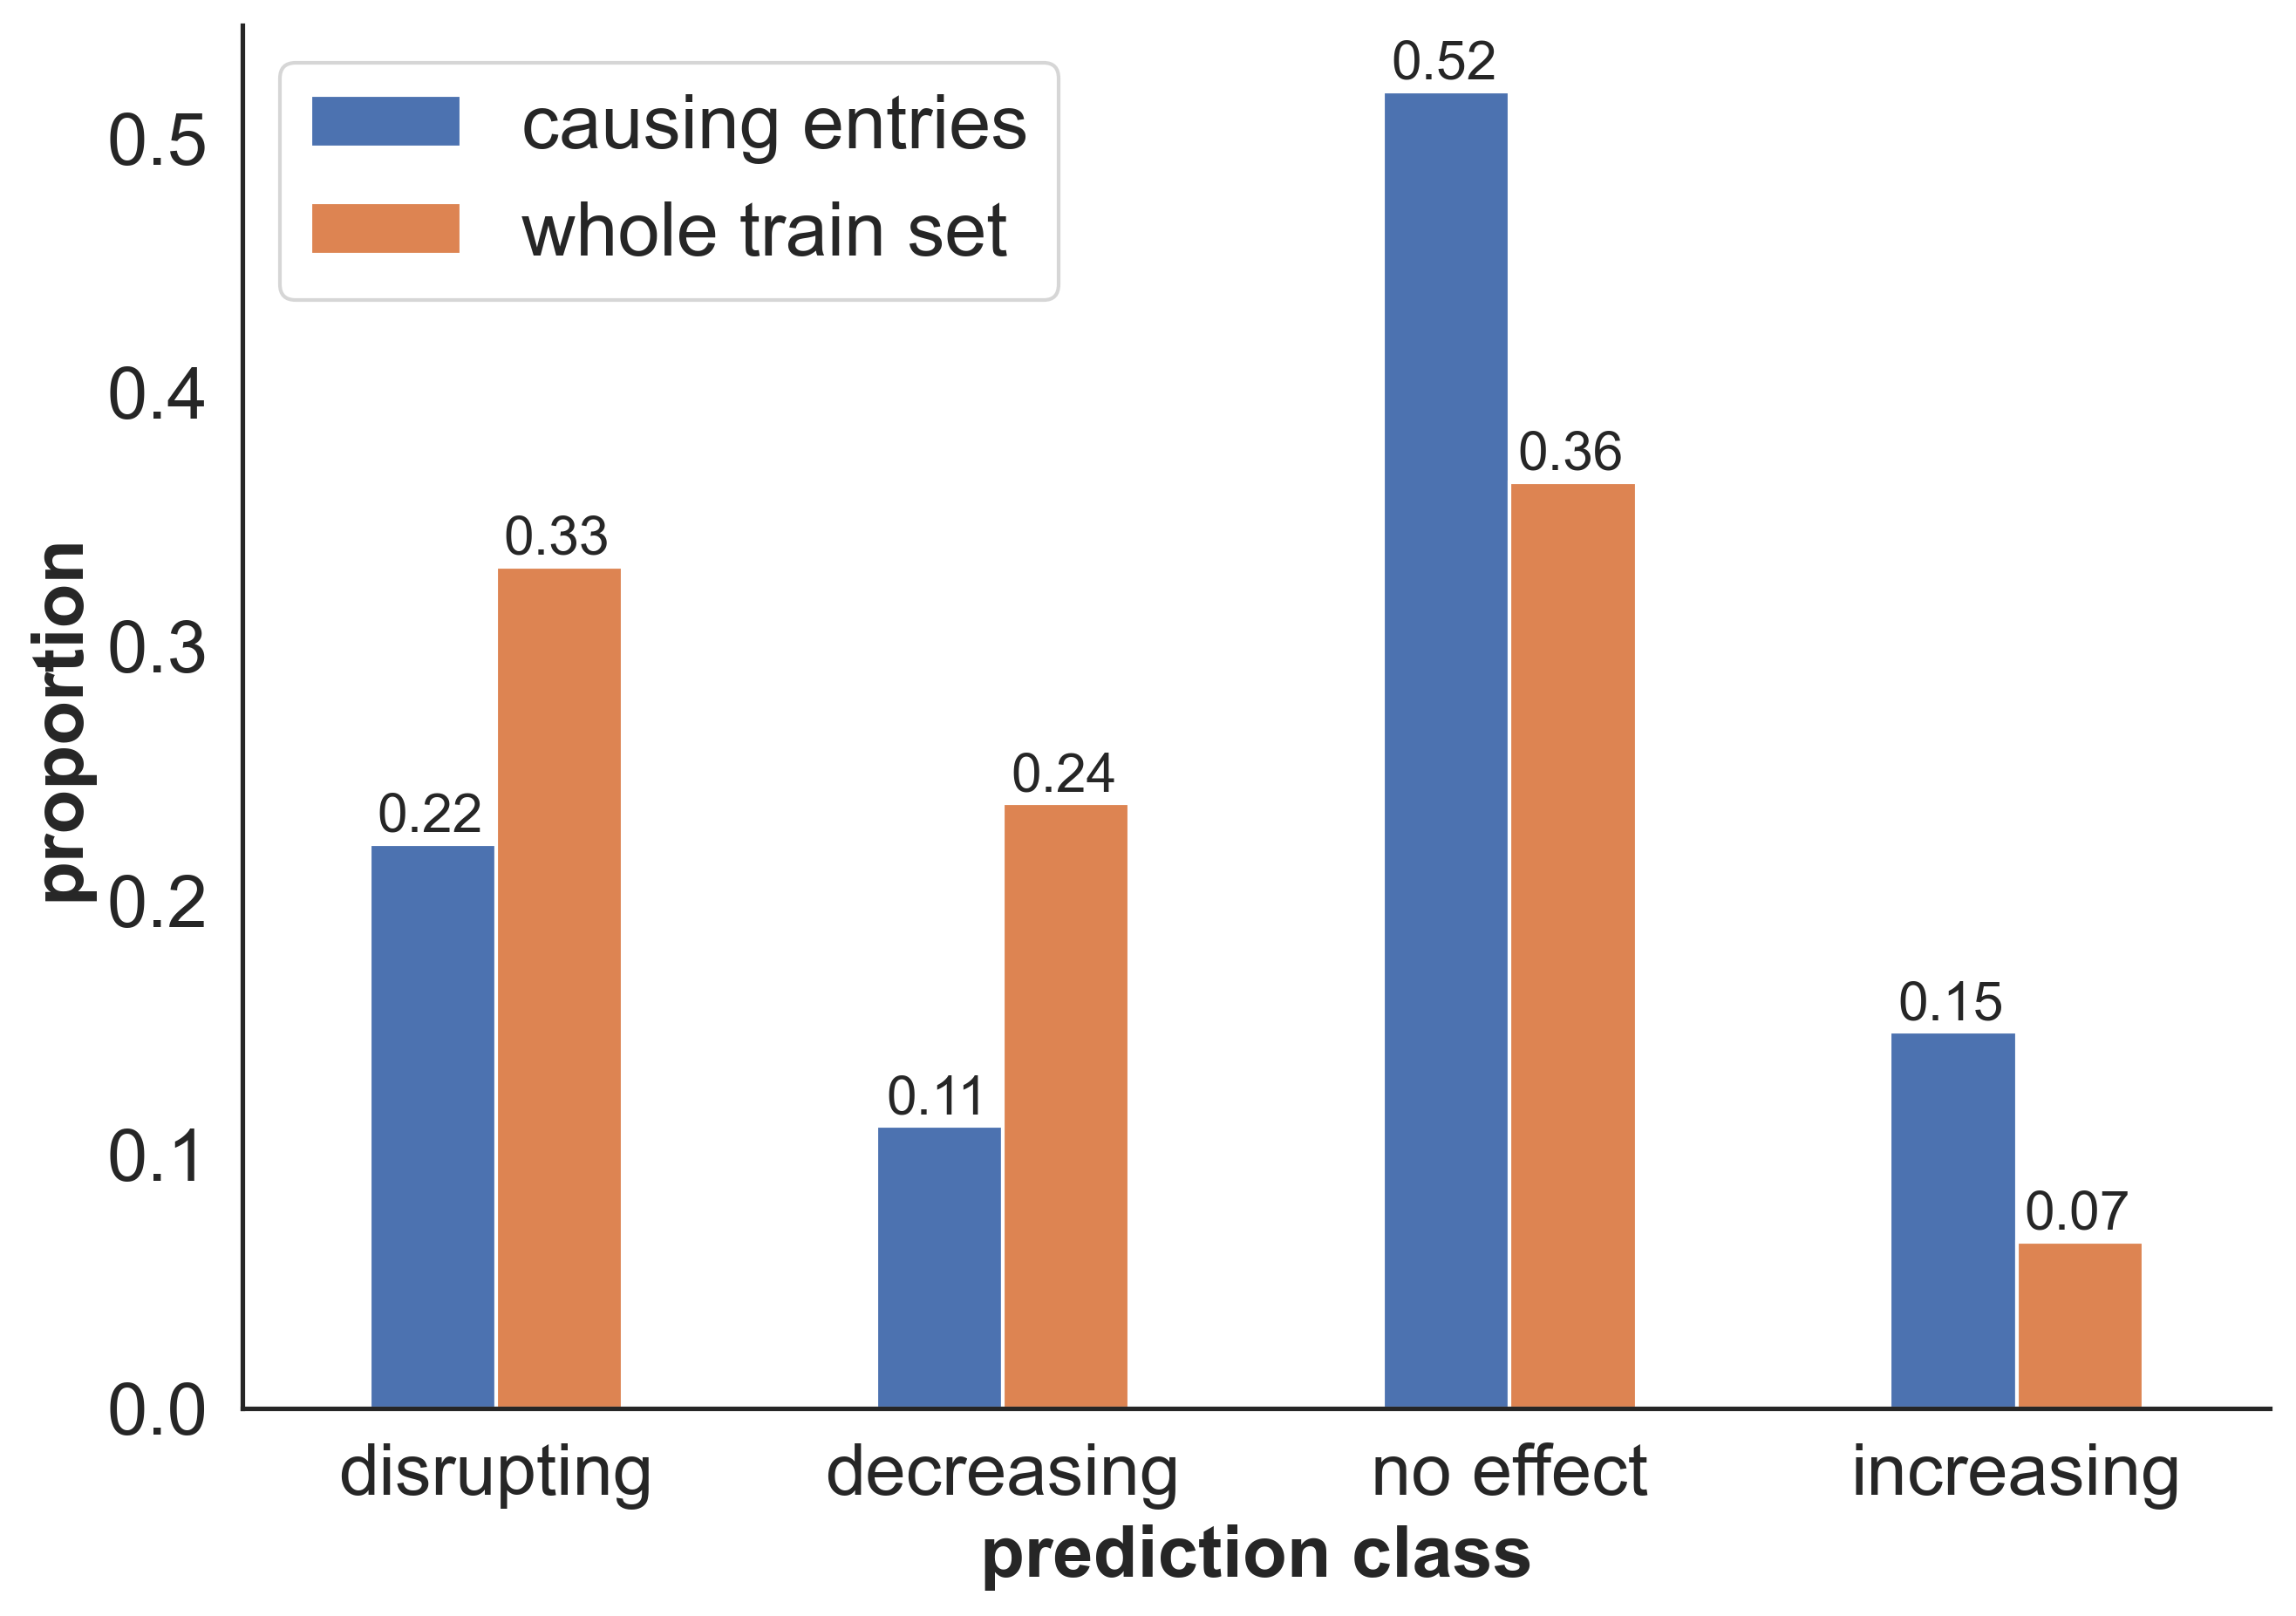

In [151]:
counts = np.array([12, 6, 28, 8])
counts = counts / sum(counts)
counts_ori = np.array([5452, 3920, 6000, 1079])
counts_ori = counts_ori / sum(counts_ori)
index = ['disrupting', 'decreasing', 'no effect', 'increasing']
df_ca_bar = pd.DataFrame({'causing entries': counts, 'whole train set': counts_ori}, index=index)
plt.figure(dpi=300)
ax = df_ca_bar.plot.bar(rot=0, figsize=(10, 7), ax=plt.gca())

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), (p.get_x() * 1 + 0.12, p.get_height() * 1 + 0.005), fontsize=15, horizontalalignment='center')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('prediction class', fontsize=20, fontweight='bold')
plt.ylabel('proportion', fontsize=20, fontweight='bold')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize='x-large', title_fontsize='20')

png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)
print(png2.info)

# Save as TIFF
png2.save("causing_items.tiff", dpi=png2.info['dpi'])
png1.close()

In [51]:
df_con = pd.read_pickle(r'../data/processed_mutations_conflicts.dataset')
df_con = df_con[~(df_con['label'] == 4)]

df_con['ori_mut_id'] = df_con['mutAC1'] + df_con['parAC']
print(df_con.shape)
df_con = df_con[df_con.duplicated(['ori_mut_id'], keep=False)]
print(df_con.shape)

(1111, 30)
(1068, 30)


In [52]:
df_con = get_predict(df_con, model=model)

(1068, 51, 20)
(1068, 51, 20)
(1068, 1024, 20)


In [54]:
df_con['label'].value_counts()

1    450
0    441
2    124
3     53
Name: label, dtype: int64

In [273]:
Counter(df_con['ori_mut_id'].value_counts())
id_unique = df_con['ori_mut_id'].unique()

In [274]:
agree_count = 0
nonagree_index = []
agree_index = []
conflict_degree = []
agree_arr = np.zeros(id_unique.shape[0])
for idx, ids in enumerate(id_unique):
    tmp_count = agree_count
    df_tmp = df_con[df_con['ori_mut_id'] == ids]
    pred_label = df_tmp['pred'].values[0]
    conflict_degree.append(df_tmp['label'].max() - df_tmp['label'].min())
    for i in df_tmp['label'].values:
        if i == pred_label:
            agree_count += 1
            agree_arr[idx] = 1
            break
    if agree_count == tmp_count:
        for i in df_tmp.index:
            nonagree_index.append(i)
    else:
        for i in df_tmp.index:
            agree_index.append(i)
print(agree_count)

435


In [58]:
id_unique.shape

(529,)

In [276]:
Counter(conflict_degree)

Counter({1: 442, 2: 74, 3: 13})

In [277]:
Counter(agree_arr)

Counter({0.0: 94, 1.0: 435})

In [270]:
df_con.to_csv('df_con_check.csv')

In [280]:
df_con_b = pd.DataFrame({'con_degree': conflict_degree, 'In agree': agree_arr})
df_con_b.groupby(['In agree', 'con_degree'])['In agree'].count()

In agree  con_degree
0.0       1              77
          2              10
          3               7
1.0       1             365
          2              64
          3               6
Name: In agree, dtype: int64

D:\SoftWare\Anaconda\envs\dl\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


{'Software': 'Matplotlib version3.3.1, https://matplotlib.org/', 'dpi': (300, 300)}


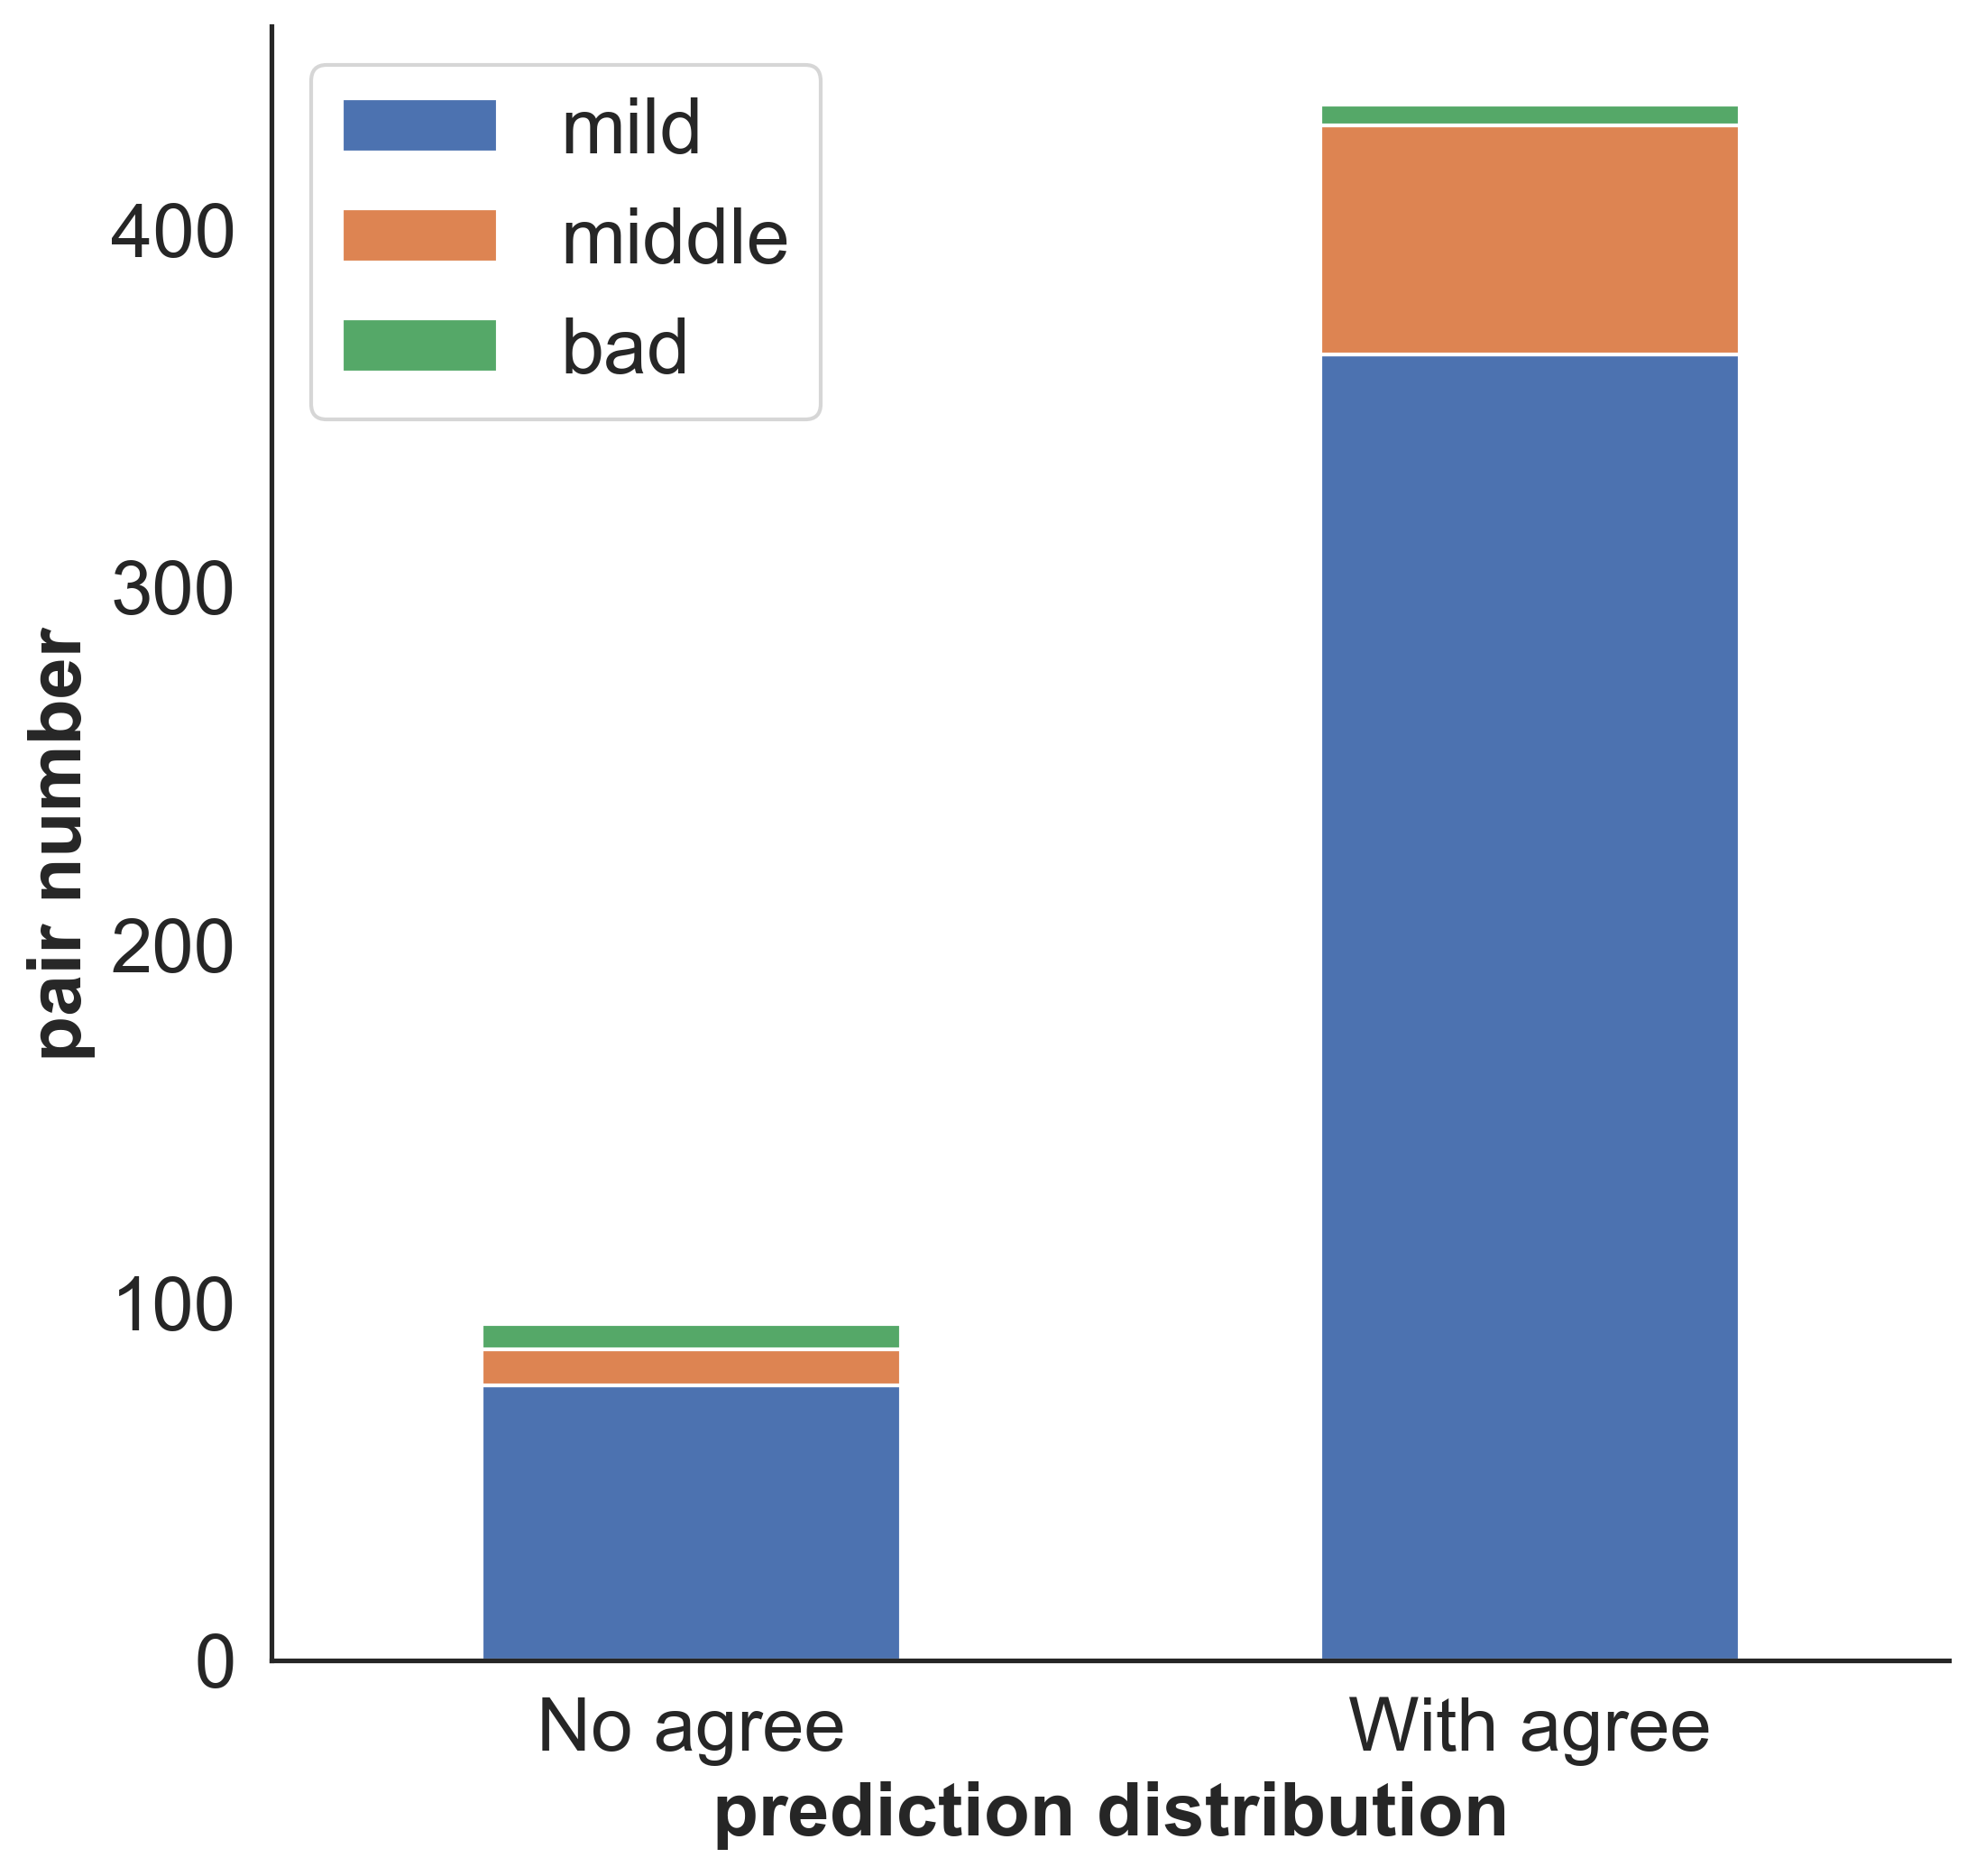

In [153]:
df_con_b_ =  pd.DataFrame(np.array([[77, 10, 7], [365, 64, 6]]), index=['No agree', 'With agree'],
                         columns=pd.Index(['mild', 'middle', 'bad'], name='conflict type'))
plt.figure(dpi=300)
df_con_b_.plot.bar(stacked=True, figsize=(8, 8), rot=0, ax=plt.gca())

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('prediction distribution', fontsize=20, fontweight='bold')
plt.ylabel('pair number', fontsize=20, fontweight='bold')
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize='x-large', title_fontsize='20')

png1 = io.BytesIO()
plt.savefig(png1, format="png")

# Load this image into PIL
png2 = Image.open(png1)
print(png2.info)

# Save as TIFF
png2.save("conflict_items.tiff", dpi=png2.info['dpi'])
png1.close()

## multi-point mutation entries test

In [68]:
df_mul = pd.read_pickle(r'./data/processed_mutations_multi.dataset')
df_mul.shape

(6297, 13)

In [69]:
df_mul = df_mul[~(df_mul['label'] == 4)]

In [70]:
df_mul['label'].value_counts()

0    3306
1    2170
3     459
2     324
Name: label, dtype: int64

In [71]:
df_mul = get_predict(df_mul, model=model)

(6259, 51, 20)
(6259, 51, 20)
(6259, 1024, 20)


In [72]:
df_mul['pred'].value_counts()

0    2977
1    2337
2     636
3     309
Name: pred, dtype: int64

In [79]:
df_mul[(df_mul['label'] == 0) & (df_mul['pred'] == 0)].shape

(1797, 16)

In [96]:
df_mul[(df_mul['label'] == 3) & (df_mul['pred'] == 3)]['ori_index'].unique().shape

(77,)

In [78]:
# new_value = df_mul['pssm_win_mut1'].values
# for i in range(new_value.shape[0]):
#     if new_value[i].shape[0] != 51:
#         print(i)
# new_value[3716] = np.r_[new_value[3716], np.zeros((1, 20))]
# new_value[3715] = np.r_[new_value[3715], np.zeros((1, 20))]

# df_mul['pssm_win_mut1'] = new_value
# df_mul.to_pickle(r'/lustre/home/acct-bmelgn/bmelgn-2/QianWei/MIPPI2/data/test_sets/raw_s51_pssm_multi_0905_modified.dataset')

In [154]:
unique_index = df_mul['ori_index'].unique()
multi_agree_arr = np.zeros((4, 4))
for i in unique_index:
    tmp = df_mul[df_mul['ori_index'] == i]
    tmp_label = tmp['label'].unique()[0]
    tmp_pred = tmp['pred'].tolist()
    if 0 in tmp_pred:
        multi_agree_arr[tmp_label, 0] += 1
    elif tmp_pred.count(1) > 1:
        if tmp_label == 0:
            multi_agree_arr[tmp_label, 0] += 1
        elif tmp_label == 1:
            multi_agree_arr[tmp_label, 1] += 1
    elif (1 in tmp_pred):
        multi_agree_arr[tmp_label, 1] += 1
    elif not ((0 in tmp_pred) or (1 in tmp_pred) or (3 in tmp_pred)):
        multi_agree_arr[tmp_label, 2] += 1
    elif (3 in tmp_pred):
        multi_agree_arr[tmp_label, 3] += 1


In [155]:
multi_agree_arr

array([[1153.,   42.,   27.,   13.],
       [ 438.,  380.,   33.,   12.],
       [  71.,    9.,   41.,    6.],
       [  70.,   28.,    6.,   29.]])

In [160]:
tmp = multi_agree_arr
for i in range(tmp.shape[0]):
    tmp[i,:] /= tmp.sum(axis=-1)[i]
tmp

array([[0.93360324, 0.0340081 , 0.02186235, 0.01052632],
       [0.50753187, 0.44032445, 0.0382387 , 0.01390498],
       [0.55905512, 0.07086614, 0.32283465, 0.04724409],
       [0.52631579, 0.21052632, 0.04511278, 0.21804511]])

In [102]:
df_mul[df_mul['label'] == 1]['pred'].value_counts()

1    971
0    912
2    199
3     88
Name: pred, dtype: int64

In [105]:
df_mul[(df_mul['label'] == 2) & (df_mul['pred'] == 2)].shape

(123, 16)

In [164]:
df_mul.to_csv('df_mul_check.csv')